# Import Necessary Pacakges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas_profiling import ProfileReport


In [2]:
data = pd.read_csv("covid.csv")
df = pd.DataFrame(data)

In [3]:
df.head(5)

,Date,ID,y,Age,Sex,Hematocrit,Hemoglobin,RedBloodCells,Leukocytes,Platelets,...,Monocytes,Monocytes%,Lymphocytes,Lymphocytes%,Eosinophils,Eosinophils%,Basophils,Basophils%,Neutrophils,Neutrophils%
0,2019-11-01,031c2dbbb442fbf34f10b8ae8c449f20e3e28879,0,52.3,F,36.8,12.9,4.25,6.13,220,...,313,5.1,1833,29.9,270,4.4,49,0.8,3653,59.6
1,2019-11-01,07cc82b2ac0e5f5c9506f66925c2fab9a49bb2bd,0,58.3,M,44.4,14.9,4.89,5.99,148,...,288,4.8,779,13.0,78,1.3,30,0.5,4816,80.4
2,2019-11-01,0beed42a87bf4a0727f371273d6fb50610da2ede,0,69.3,M,39.7,13.5,4.44,7.42,130,...,579,7.8,2078,28.0,89,1.2,59,0.8,4615,62.2
3,2019-11-01,10af03c78251959c15d84bb8118f8dc38121ce8a,0,29.3,M,40.3,14.3,4.71,6.03,204,...,368,6.1,2430,40.3,90,1.5,42,0.7,3087,51.2
4,2019-11-01,10b7bd07f47e984a595b2b5be1e0500265964123,0,38.3,M,45.4,15.3,5.37,8.92,157,...,517,5.8,1276,14.3,98,1.1,18,0.2,7011,78.6


In [4]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 14681 rows and 25 columns


In [5]:
df.columns

Index(['Date', 'ID', 'y', 'Age', 'Sex', 'Hematocrit', 'Hemoglobin',
       'RedBloodCells', 'Leukocytes', 'Platelets', 'MPV', 'MCV', 'MCHC', 'MCH',
       'RDW', 'Monocytes', 'Monocytes%', 'Lymphocytes', 'Lymphocytes%',
       'Eosinophils', 'Eosinophils%', 'Basophils', 'Basophils%', 'Neutrophils',
       'Neutrophils%'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14681 entries, 0 to 14680
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           14681 non-null  object 
 1   ID             14681 non-null  object 
 2   y              14681 non-null  int64  
 3   Age            14681 non-null  float64
 4   Sex            14681 non-null  object 
 5   Hematocrit     14681 non-null  float64
 6   Hemoglobin     14681 non-null  float64
 7   RedBloodCells  14681 non-null  float64
 8   Leukocytes     14681 non-null  float64
 9   Platelets      14681 non-null  int64  
 10  MPV            14681 non-null  float64
 11  MCV            14681 non-null  float64
 12  MCHC           14681 non-null  float64
 13  MCH            14681 non-null  float64
 14  RDW            14681 non-null  float64
 15  Monocytes      14681 non-null  int64  
 16  Monocytes%     14681 non-null  float64
 17  Lymphocytes    14681 non-null  int64  
 18  Lympho

In [7]:
df = df.drop('ID', axis = 1)
df = df.drop('Date', axis = 1)
df

,y,Age,Sex,Hematocrit,Hemoglobin,RedBloodCells,Leukocytes,Platelets,MPV,MCV,...,Monocytes,Monocytes%,Lymphocytes,Lymphocytes%,Eosinophils,Eosinophils%,Basophils,Basophils%,Neutrophils,Neutrophils%
0,0,52.3,F,36.8,12.9,4.25,6.13,220,10.6,86.6,...,313,5.1,1833,29.9,270,4.4,49,0.8,3653,59.6
1,0,58.3,M,44.4,14.9,4.89,5.99,148,10.4,90.8,...,288,4.8,779,13.0,78,1.3,30,0.5,4816,80.4
2,0,69.3,M,39.7,13.5,4.44,7.42,130,11.0,89.4,...,579,7.8,2078,28.0,89,1.2,59,0.8,4615,62.2
3,0,29.3,M,40.3,14.3,4.71,6.03,204,9.8,85.6,...,368,6.1,2430,40.3,90,1.5,42,0.7,3087,51.2
4,0,38.3,M,45.4,15.3,5.37,8.92,157,11.5,84.5,...,517,5.8,1276,14.3,98,1.1,18,0.2,7011,78.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14676,1,88.1,F,35.3,10.7,3.73,7.55,226,10.0,94.6,...,778,10.3,1200,15.9,174,2.3,8,0.1,5391,71.4
14677,0,49.1,F,34.8,12.0,4.06,5.37,325,9.6,85.7,...,408,7.6,2143,39.9,102,1.9,48,0.9,2669,49.7
14678,1,59.1,M,37.4,12.6,4.72,10.69,387,9.8,79.2,...,673,6.3,2555,23.9,86,0.8,32,0.3,7344,68.7
14679,1,89.1,F,42.1,13.3,4.17,5.39,238,10.1,101.0,...,447,8.3,2318,43.0,302,5.6,22,0.4,2302,42.7


In [8]:
df.groupby('y').size()

y
0    12664
1     2017
dtype: int64

In [9]:
df= df.rename(columns = {'y': 'Diagnosis'})

In [10]:
df.columns

Index(['Diagnosis', 'Age', 'Sex', 'Hematocrit', 'Hemoglobin', 'RedBloodCells',
       'Leukocytes', 'Platelets', 'MPV', 'MCV', 'MCHC', 'MCH', 'RDW',
       'Monocytes', 'Monocytes%', 'Lymphocytes', 'Lymphocytes%', 'Eosinophils',
       'Eosinophils%', 'Basophils', 'Basophils%', 'Neutrophils',
       'Neutrophils%'],
      dtype='object')

In [11]:
df['Diagnosis'] = df.Diagnosis.astype('category')

In [12]:
df.dtypes

Diagnosis        category
Age               float64
Sex                object
Hematocrit        float64
Hemoglobin        float64
RedBloodCells     float64
Leukocytes        float64
Platelets           int64
MPV               float64
MCV               float64
MCHC              float64
MCH               float64
RDW               float64
Monocytes           int64
Monocytes%        float64
Lymphocytes         int64
Lymphocytes%      float64
Eosinophils         int64
Eosinophils%      float64
Basophils           int64
Basophils%        float64
Neutrophils         int64
Neutrophils%      float64
dtype: object

In [13]:
%matplotlib inline

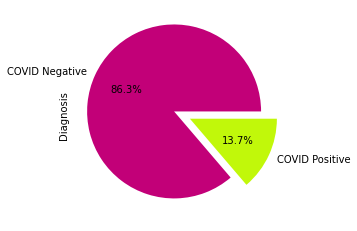

In [14]:
colors = ['#C20078','#C1F80A']
plot = df.Diagnosis.value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['COVID Negative', 'COVID Positive'], colors = colors, explode=[0.1,0.1])

# Evaluate For Null Values:

In [15]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by= 'count', ascending = False)

,count,%
Diagnosis,0,0.0
RDW,0,0.0
Neutrophils,0,0.0
Basophils%,0,0.0
Basophils,0,0.0
Eosinophils%,0,0.0
Eosinophils,0,0.0
Lymphocytes%,0,0.0
Lymphocytes,0,0.0
Monocytes%,0,0.0


It appears that I have no missing values in the data set

# Evaluating The Numeric Features:

In [16]:
numerics = ['int64', 'float64']
df_numeric = df.select_dtypes(include=numerics)

In [17]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,14681.0,45.080955,18.092217,0.10,34.00,43.50,56.80,89.10
Hematocrit,14681.0,40.321108,4.572492,16.17,37.60,40.50,43.40,63.60
Hemoglobin,14681.0,13.731252,1.664699,5.25,12.70,13.80,14.90,21.15
RedBloodCells,14681.0,4.661064,0.589580,1.79,4.31,4.67,5.04,7.70
Leukocytes,14681.0,7.514633,2.861598,0.53,5.60,7.01,8.86,81.84
Platelets,14681.0,242.594374,71.740445,9.00,196.00,236.00,281.00,891.00
MPV,14681.0,10.287869,0.941792,7.60,9.60,10.20,10.90,14.70
MCV,14681.0,86.796175,5.005622,55.10,84.10,87.00,89.70,130.40
MCHC,14681.0,34.035963,1.045723,27.40,33.40,34.00,34.70,38.60
MCH,14681.0,29.543968,1.919510,16.70,28.60,29.70,30.70,43.00


# Outlier Analysis:

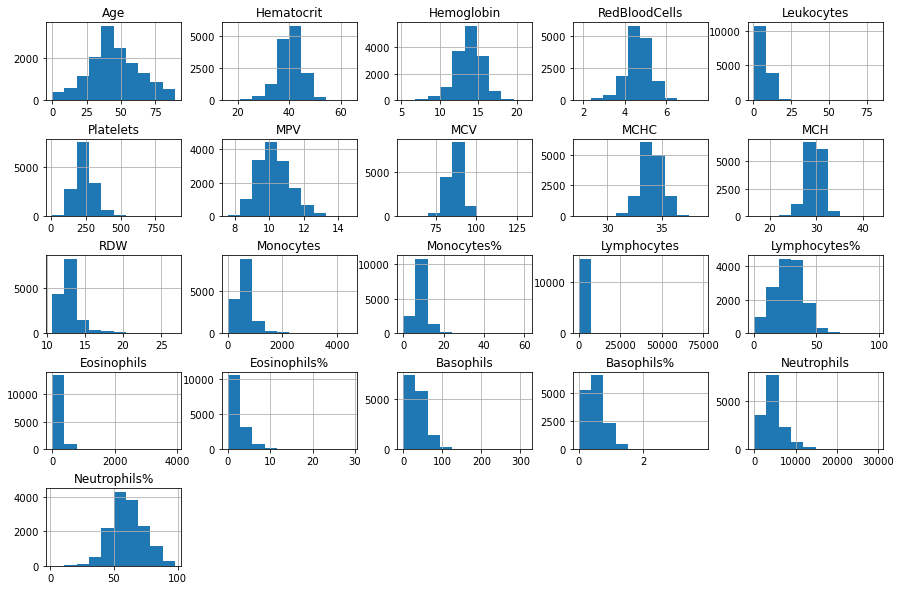

In [18]:
df_numeric.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

Most of the distributions exhibit right-sided skewness. I need to evaluate if I want to cap the data in order to prevent outliers that are greater than two standard deviations from the mean. 

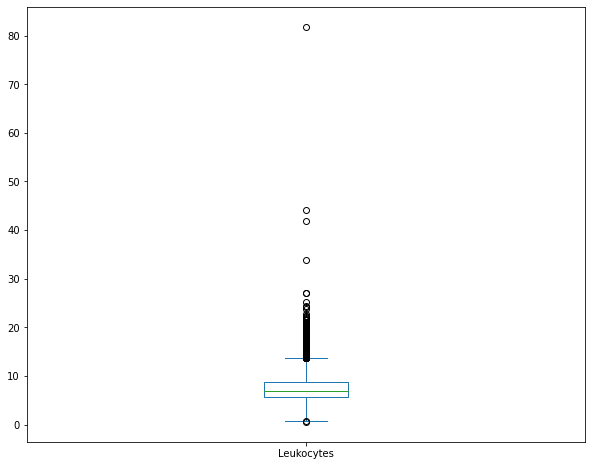

In [19]:
df_numeric['Leukocytes'].plot(kind = 'box', figsize = (10,8))
plt.show()

I can see that my data is subject to outliers on both extreme ends. As someone with medical knowledge I'm curious as to what the units for these lab values are. The normal Leukocyte range in America is 4,500 to 11,000 WBC per microliter. This data was pulled from Brazil and as far as I can see their measurements are not different. Regardless, I will practice capping the data. If I were using a linear regression moving forward I would want to normalize the entire data set. As I will be leaning more towards decision trees I won't need to worry about outliers and unbalanced y labels.

In [20]:
# save the data to a new csv file
df_cleaned = df
df.to_csv('df_cleaned.csv', index=False)

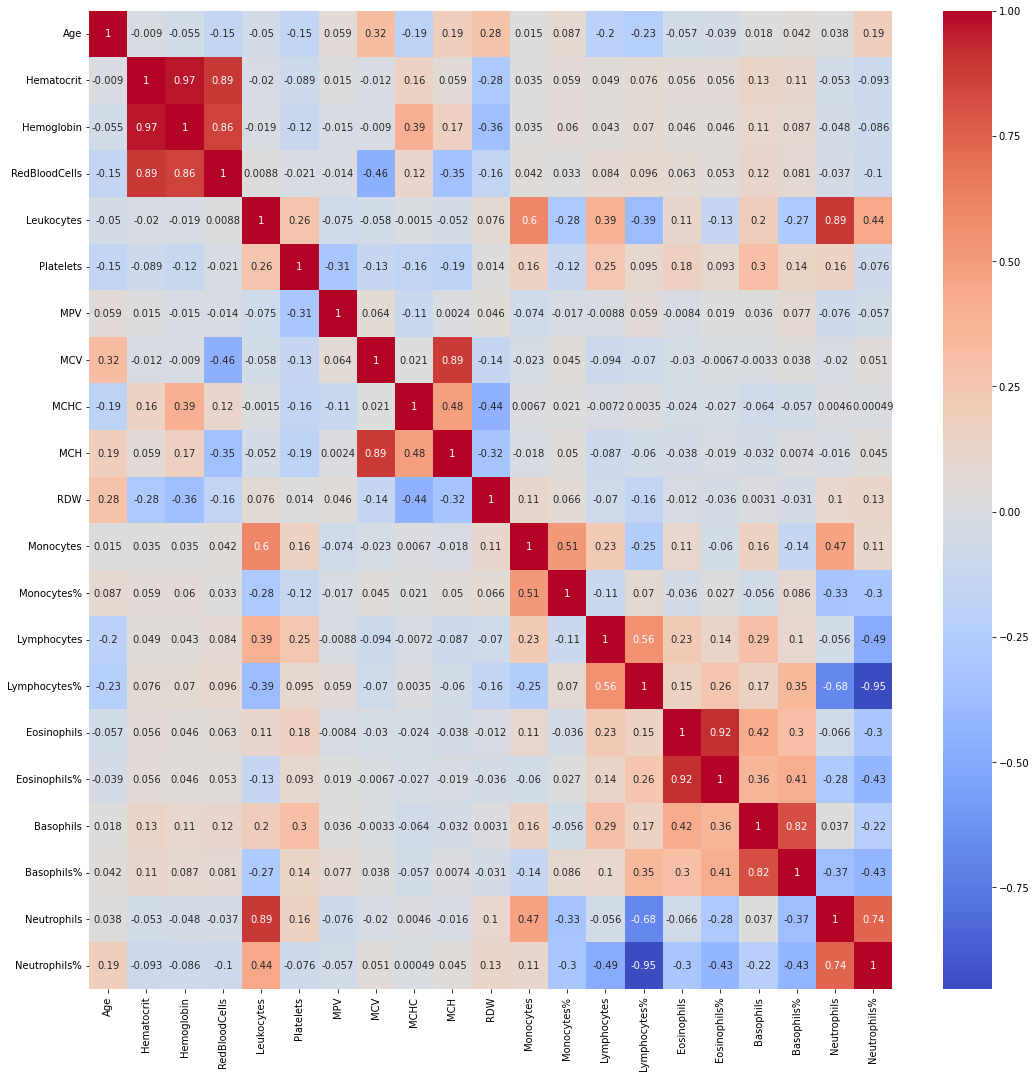

In [21]:
corr = df_cleaned.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

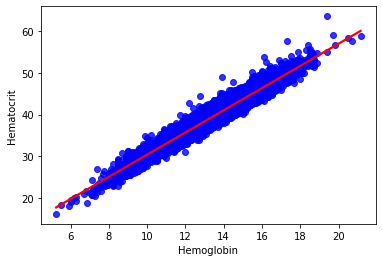

In [22]:
sns.regplot(x="Hemoglobin", y="Hematocrit", scatter_kws={"color": "blue"}, line_kws={"color": "red"}, data=df_cleaned);

# Pre - Processing

In [71]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

In [47]:
df_cleaned['Diagnosis'] = df_cleaned.Diagnosis.astype(int)

In [53]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [54]:
encode_and_bind(df_cleaned, 'Sex')

,Diagnosis,Age,Sex,Hematocrit,Hemoglobin,RedBloodCells,Leukocytes,Platelets,MPV,MCV,...,Lymphocytes,Lymphocytes%,Eosinophils,Eosinophils%,Basophils,Basophils%,Neutrophils,Neutrophils%,Sex_F,Sex_M
0,0,52.3,F,36.8,12.9,4.25,6.13,220,10.6,86.6,...,1833,29.9,270,4.4,49,0.8,3653,59.6,1,0
1,0,58.3,M,44.4,14.9,4.89,5.99,148,10.4,90.8,...,779,13.0,78,1.3,30,0.5,4816,80.4,0,1
2,0,69.3,M,39.7,13.5,4.44,7.42,130,11.0,89.4,...,2078,28.0,89,1.2,59,0.8,4615,62.2,0,1
3,0,29.3,M,40.3,14.3,4.71,6.03,204,9.8,85.6,...,2430,40.3,90,1.5,42,0.7,3087,51.2,0,1
4,0,38.3,M,45.4,15.3,5.37,8.92,157,11.5,84.5,...,1276,14.3,98,1.1,18,0.2,7011,78.6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14676,1,88.1,F,35.3,10.7,3.73,7.55,226,10.0,94.6,...,1200,15.9,174,2.3,8,0.1,5391,71.4,1,0
14677,0,49.1,F,34.8,12.0,4.06,5.37,325,9.6,85.7,...,2143,39.9,102,1.9,48,0.9,2669,49.7,1,0
14678,1,59.1,M,37.4,12.6,4.72,10.69,387,9.8,79.2,...,2555,23.9,86,0.8,32,0.3,7344,68.7,0,1
14679,1,89.1,F,42.1,13.3,4.17,5.39,238,10.1,101.0,...,2318,43.0,302,5.6,22,0.4,2302,42.7,1,0


In [55]:
X = df_cleaned.drop(['Diagnosis', 'Sex'], axis = 1)
y = df_cleaned['Diagnosis']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [57]:
X_train.shape, X_test.shape

((10276, 21), (4405, 21))

In [58]:
y_train.shape, y_test.shape

((10276,), (4405,))

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred_test = forest.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred_test)

0.8980703745743474

In [64]:
confusion_matrix(y_test, y_pred_test)

array([[3742,   66],
       [ 383,  214]])

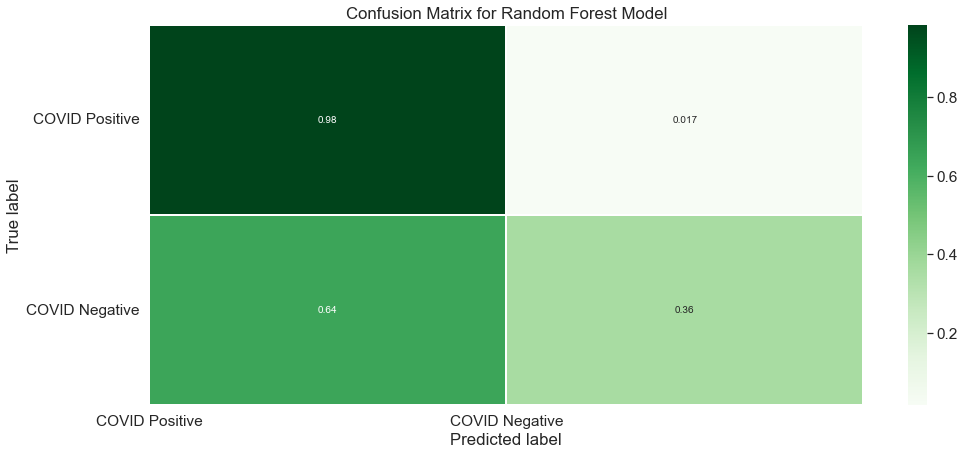

In [66]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['COVID Positive', 'COVID Negative']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [67]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3808
           1       0.76      0.36      0.49       597

    accuracy                           0.90      4405
   macro avg       0.84      0.67      0.72      4405
weighted avg       0.89      0.90      0.88      4405



In [68]:
rf_default_cv_results = cross_validate(forest,X_train, y_train, cv=5)

In [69]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.89348249, 0.8836983 , 0.89683698, 0.89002433, 0.88953771])

In [70]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.8907159627746694, 0.004387136315365182)

In [78]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [79]:
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [80]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.6s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=  24.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.2s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   3.4s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   3.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  11.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=4

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [89]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=700)

Use best estimator features to see if they imporved accuracy in Random Forest Model

In [90]:
forest_best = RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=700)

In [91]:
forest_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=700)

In [92]:
y_pred_test = forest_best.predict(X_test)

In [93]:
accuracy_score(y_test, y_pred_test)

0.8969353007945516

In [94]:
confusion_matrix(y_test, y_pred_test)

array([[3730,   78],
       [ 376,  221]])

In [95]:
rf_default_cv_results = cross_validate(forest_best,X_train, y_train, cv=5)

In [96]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.88910506, 0.88807786, 0.89294404, 0.89537713, 0.88905109])

In [97]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.890911036004052, 0.00278664371306652)

# kNN Model

Scale data for models that are distance-based (i.e. kNN, SVM)